The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Features**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (Desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
#import necessary basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [114]:
# read the data into dataframe
data= pd.read_csv("/content/drive/My Drive/Almabetter/capstone projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [115]:
# data view
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [116]:
# Renaming the columns
data.rename(columns={'cigsPerDay':'cigarettes_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [117]:
# encoding binary values for categorical columns- 'sex' and 'is_smoking'
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)
data.head()

,id,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [118]:
# set column-'id' as the index.
data.set_index('id',inplace=True)
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [119]:
# shape of the dataset
data.shape

(3390, 16)

Data has 3390 observations, 15 predictors and a target variable.

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3390 non-null   int64  
 1   education           3303 non-null   float64
 2   sex                 3390 non-null   int64  
 3   is_smoking          3390 non-null   int64  
 4   cigarettes_per_day  3368 non-null   float64
 5   bp_meds             3346 non-null   float64
 6   prevalent_stroke    3390 non-null   int64  
 7   prevalent_hyp       3390 non-null   int64  
 8   diabetes            3390 non-null   int64  
 9   total_cholesterol   3352 non-null   float64
 10  systolic_bp         3390 non-null   float64
 11  diastolic_bp        3390 non-null   float64
 12  BMI                 3376 non-null   float64
 13  heart_rate          3389 non-null   float64
 14  glucose             3086 non-null   float64
 15  ten_year_chd        3390 non-null   int64  
dtypes: flo

In [121]:
numerical_features=['age','cigarettes_per_day','total_cholesterol','systolic_bp','diastolic_bp','BMI','heart_rate','glucose']
categorical_features=['education','sex','is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']

In [122]:
# statistical description of the numerical features of the data
data.describe()

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Observation:

* 3390 observations of behavioural, demographic and medical features of individuals(male/female) in the age-group(32-70).

#**DATA CLEANING**

**Missing Value Analysis**

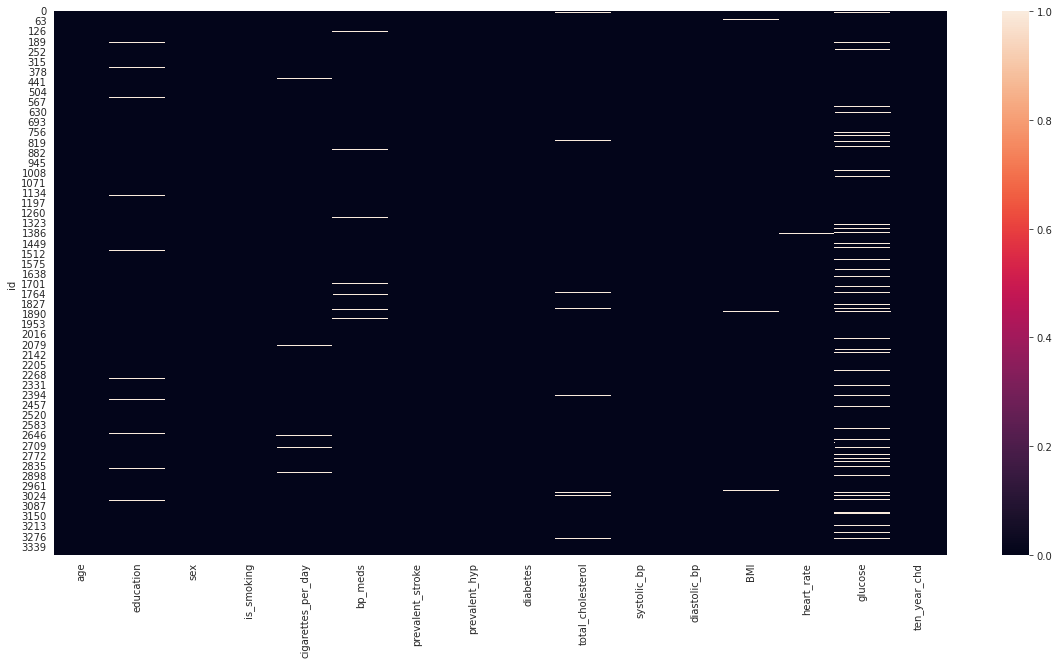

In [123]:
# using heatmap to visualize miising values in data
missing_data= data.isnull()
plt.figure(figsize=(20,10))
sns.heatmap(missing_data)

Dropping the missing data isn't a better choice since, the size of dataset is small. Therefore missing data is imputed with mode/median.

In [124]:
#function to  handle missing value for categorical variables with mode value
def categorical_missing(data,columns):
  '''The missing values in columns are imputed with the respective mode values'''
  for column in columns:
    data[column]=data[column].fillna(data[column].mode()[0])


In [125]:
# function call to insert missing values for variables - education, BPMeds
categorical_missing(data,['education','bp_meds'])


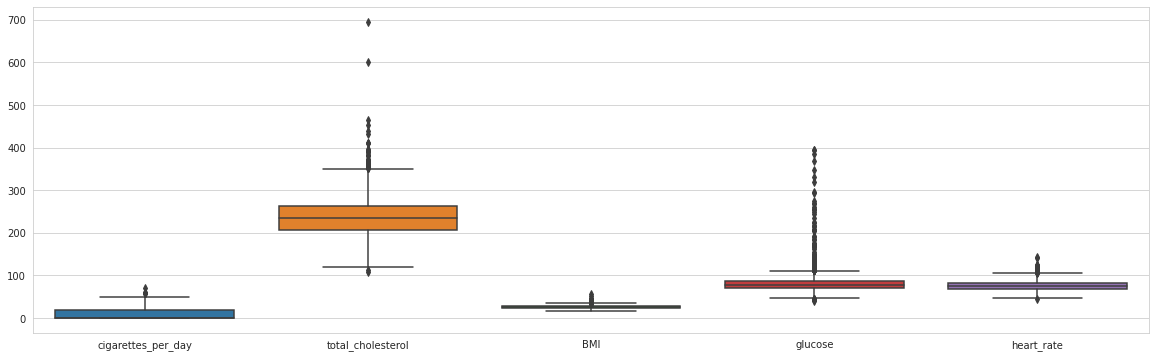

In [126]:
# boxplot for numerical features of data with missing values
plt.figure(figsize=(20,6))
cols=['cigarettes_per_day','total_cholesterol','BMI','glucose','heart_rate']
sns.boxplot(data=data[cols])

The numerical features with missing data have outliers. Therefore as the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value. 

In [127]:
data['cigarettes_per_day'].median()

0.0

Feature- 'cigarettes_per_day' is observed to have a median value: 0.0. The possible entries for feature 'is_smoking' are YES/NO. If the missing value for 'cigarettes_per_day' are imputed with median, it contradicts the entries in case where 'is_smoking' is marked as "YES".

A person marked as smoker cannot be using 0 cigarettes per day.  

Therefore, group the rows based on whether the person smokes, and then impute the missing values with the median of the grouped data.

In [128]:
# imputing the missing values of the column- 'cigarettes_per_day' with the median after grouping the data
data['cigarettes_per_day']= data['cigarettes_per_day'].fillna(data[data['is_smoking']==1]['cigarettes_per_day'].median())


In [129]:
# check for any invalid observations
# invalid observation: where 'is_smoking'=1 and  'cigarettes_per_day'=1  or 'is_smoking'=0 and  'cigarettes_per_day'>0
data[(data['is_smoking']==1) & (data['cigarettes_per_day']==0) | (data['is_smoking']==0) & (data['cigarettes_per_day']>0)] 


,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [130]:
# function to handle missing data in numerical columns using median 
def numerical_missing(data, columns):
  '''The missing values in the column are imputed with median of respective column'''
  for column in columns:
    data[column]=data[column].fillna(data[column].median())

In [131]:
# function call to impute missing values on columns- 'totChol','BMI','heartRate','glucose'.
numerical_missing(data,[['total_cholesterol','BMI','glucose','heart_rate']])

In [132]:
# check for missing values
data.isna().sum()

age                   0
education             0
sex                   0
is_smoking            0
cigarettes_per_day    0
bp_meds               0
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
total_cholesterol     0
systolic_bp           0
diastolic_bp          0
BMI                   0
heart_rate            0
glucose               0
ten_year_chd          0
dtype: int64

In [133]:
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1




---



**Outlier Analysis**

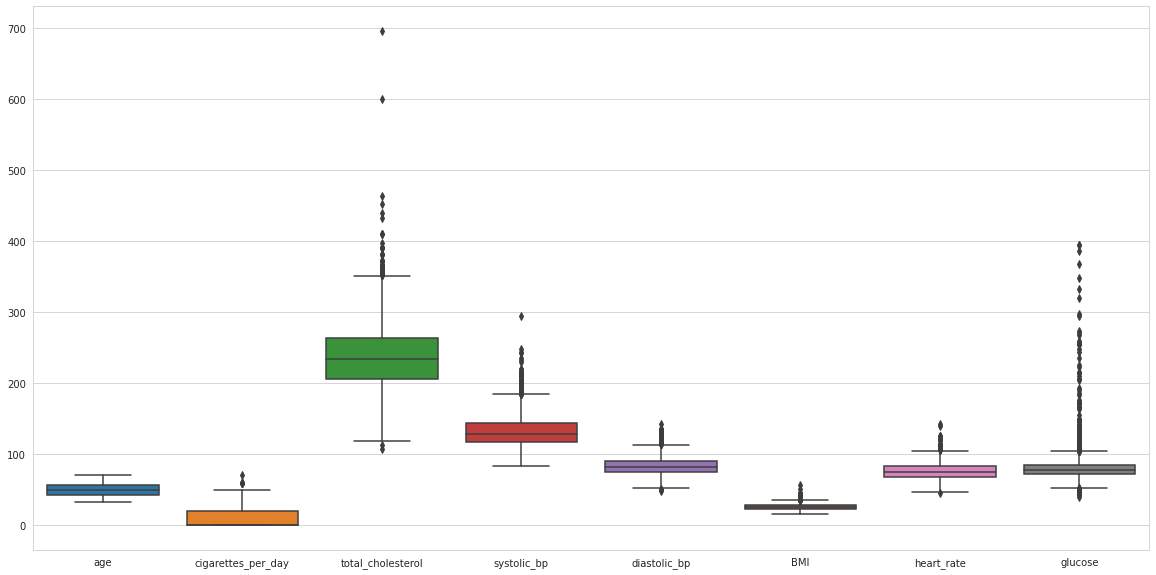

In [134]:
# boxplot for numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data= data[numerical_features])

Since, the extreme/outlier values of features in the dataset indicate the risk of cardiovascular problems that can be observed in the exploratory data analysis further, therefore, deleting/modifying the values wouldn't be a good thing to do. 

**Correlation Analysis**

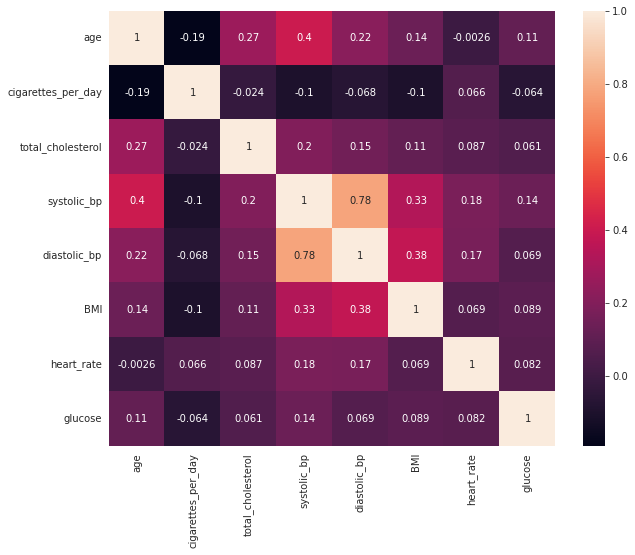

In [135]:
# plot the correlation matrix using heatmap
plt.figure(figsize=(10,8))
correlation = data[numerical_features].corr()
sns.heatmap(correlation, annot=True)

Observation:

* There is no correlation between dependent and independent variables 
* Independent variables are correlated among themselves.
  * High value of systolic bp and diastolic bp indicate prevalent hypertension.
  * High value of glucose levels indicate diabetes.
  * Systolic and diastolic blood pressure are correlated: New feature could be derived using the two features.

##**Exploratory Data Analysis**

0    2879
1     511
Name: ten_year_chd, dtype: int64

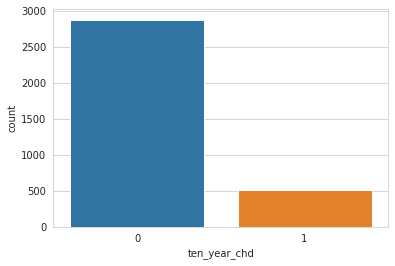

In [136]:
# dependent variable analysis
sns.countplot(data['ten_year_chd'])
data['ten_year_chd'].value_counts()

* The dependent variable is binary(categoric). Hence, a classification problem.
* There is an imbalalance in the dataset. that should be taken into consideration during further analysis.


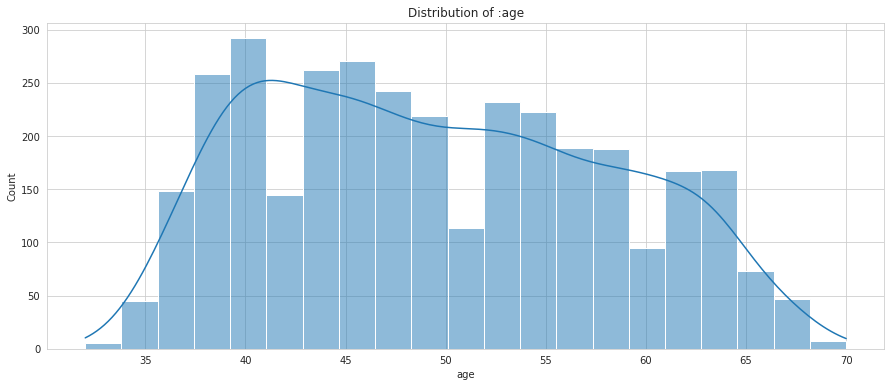

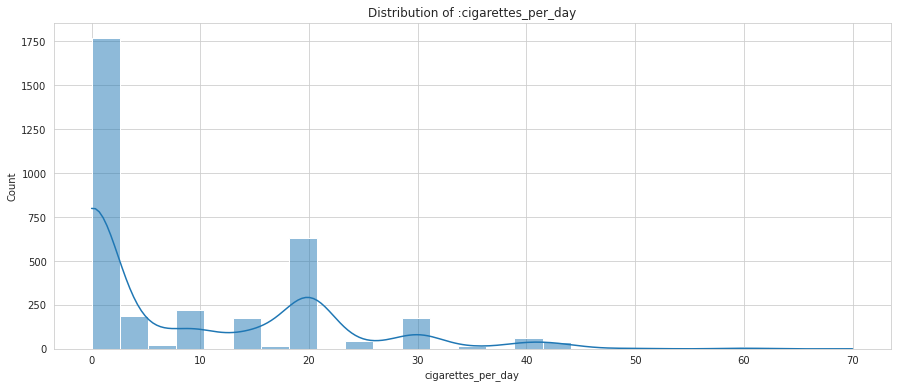

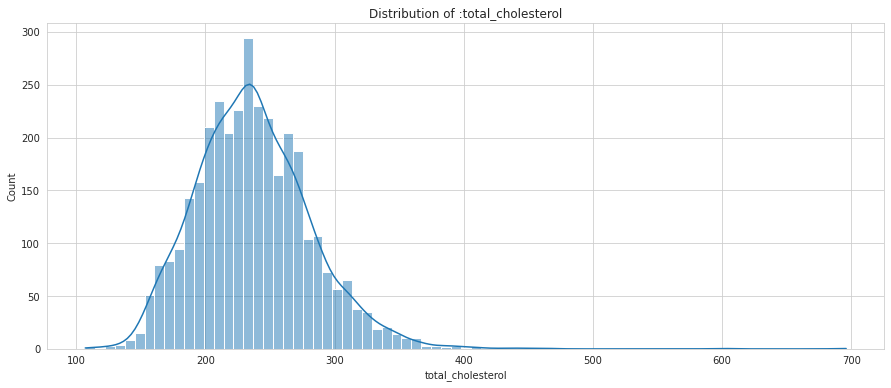

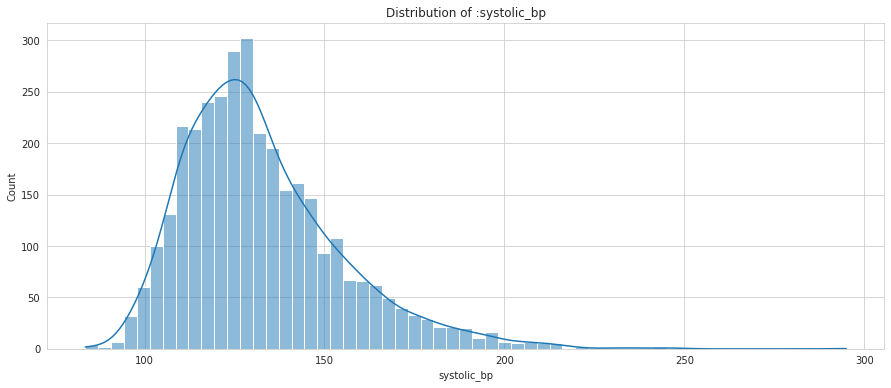

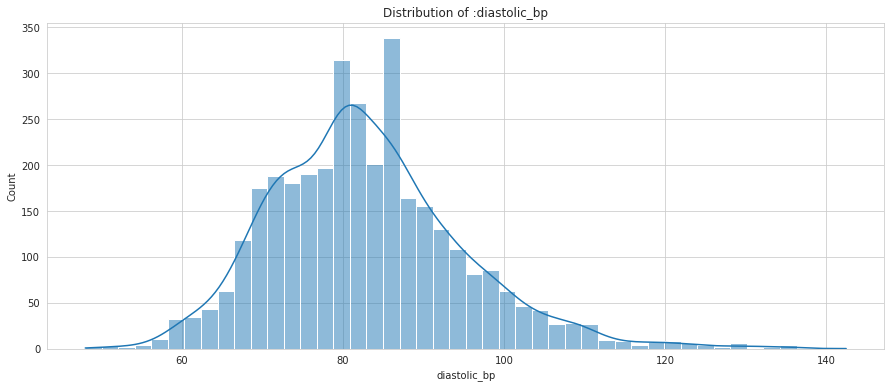

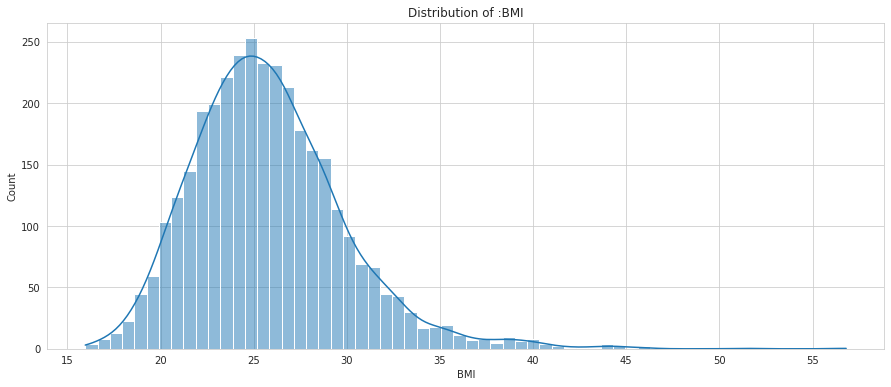

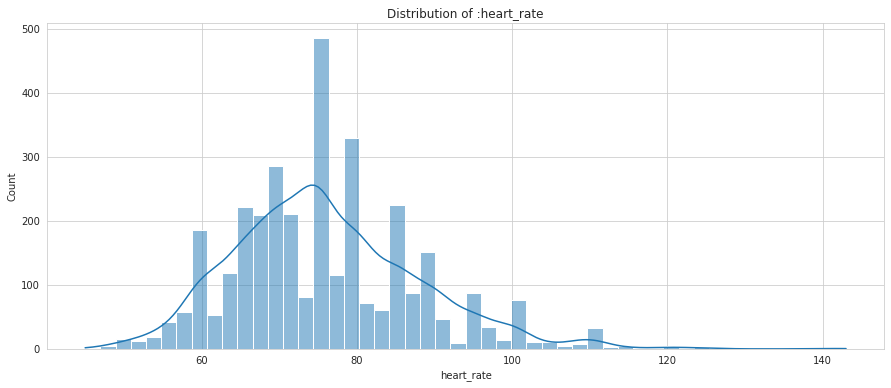

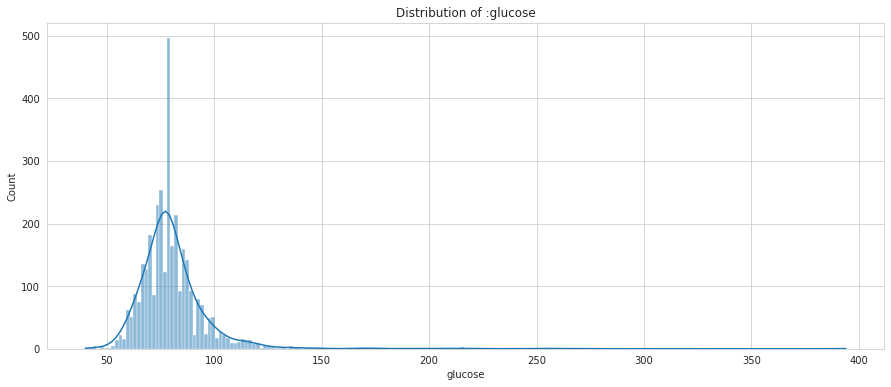

In [137]:
# independent numerical feature variable analysis using histogram 
for feature in numerical_features:
  plt.figure(figsize=(15,6))
  sns.histplot( x = data[feature], kde = True)
  plt.title('Distribution of :' +feature)
  plt.show()

Observation:

* The data is collected for patients of agegroup -> 35-70.
* Most of the patients are non-smokers.
* Features- 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'glucose', 'BMI' are rightly skewed.

In [ ]:
# # Analyzing the relationship between the dependent variable and categorical independent variables
# for feature in categorical_features:
#   plt.subplot(1, 2, 1) # row 1, col 2 index 1
#   plt.figure(figsize=(10,8))
#   sns.countplot(x=feature,hue='ten_year_chd',data=data)  
#   plt.title('Count of patients with/without risk of coronary heart disease based on: '+feature)
#   plt.subplot(1,2,2)
#   plt=plot_percentage(plt,feature)


Observation:

* Most of the patients posses education of level 1. And majority of patients with the risk of coronary hear disease, have education level of 1.
* There are more number of female patients. Whereas, the risk of the disease is higher among male patients.
*

In [161]:
def plot_percentage(categorical_features):

  for feature in categorical_features:
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()

    # ax1.bar(x=score[team], height=score[tot], color=colors)
    # ax2 = sns.countplot(x=dff[team], data=dff, palette=colors, order=team) 
    # plt.subplot(1, 2, 1) # row 1, col 2 index 1
    # plt.figure(figsize=(10,8))
    ax2=sns.countplot(x=feature,hue='ten_year_chd',data=data)  
    plt.title('Count of patients with/without risk of coronary heart disease based on: '+feature)
  
    # plt.subplot(1,2,2)

    x_var, y_var = feature, 'ten_year_chd'
    # plt.figure(figsize=(20,10))
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    data_grouped.plot.bar(stacked=True)
    # ax1.bar(data=data_grouped,stacked=True)
    ax1=plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("Percentage of patients at the risk of coronary heart disease due to: "+feature)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                   
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()


In [191]:
def plot_percentage(categorical_features):

  for feature in categorical_features:
    
    plt.rcParams["figure.figsize"] = [12,5]
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=feature,hue='ten_year_chd',data=data,ax=axes[0])  

    x_var, y_var = feature, 'ten_year_chd'
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    sns.set()
    data_grouped.plot(kind='bar', stacked=True,ax=axes[1])
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left",title=y_var)

    plt.title("Analysis of count and percentage of patients at the risk of coronary heart disease based on feature: "+feature)

    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(ix,cumulative + element / 2,f"{int(element)} %",va="center",ha="center")
            cumulative += element
    plt.show()


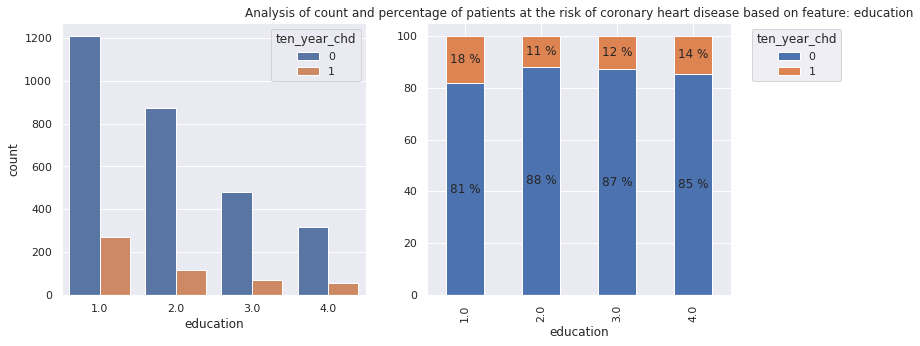

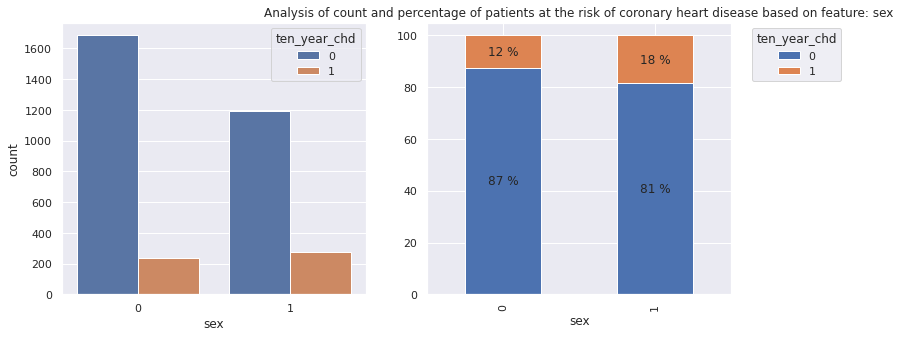

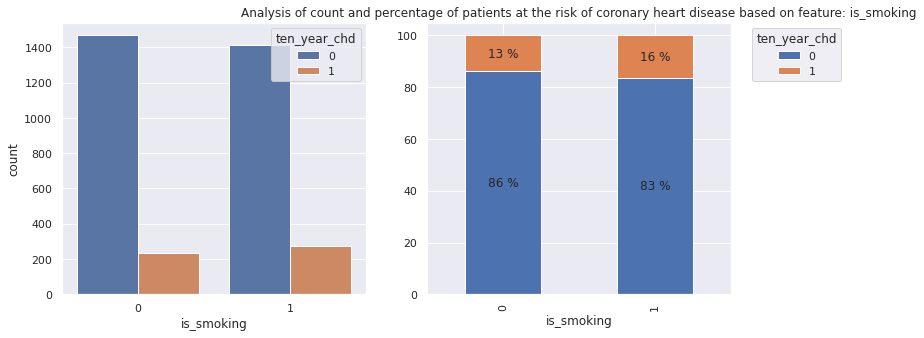

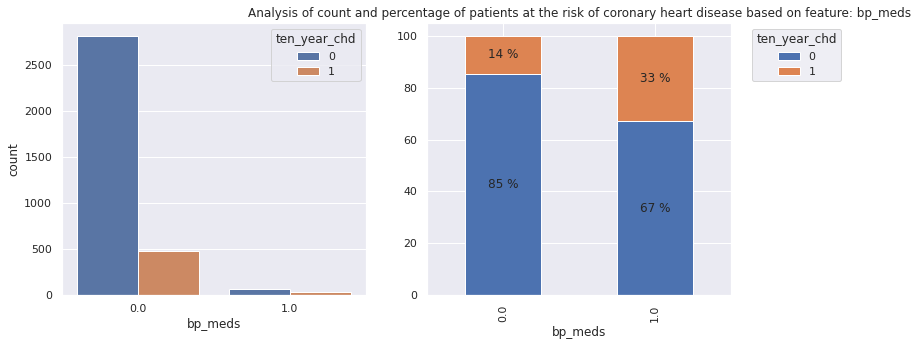

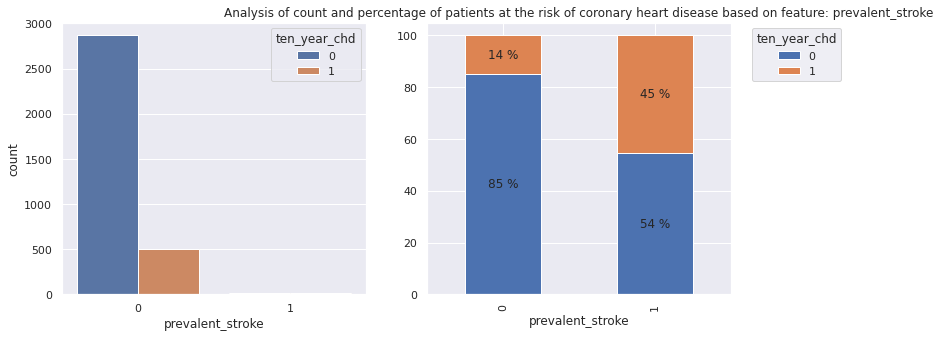

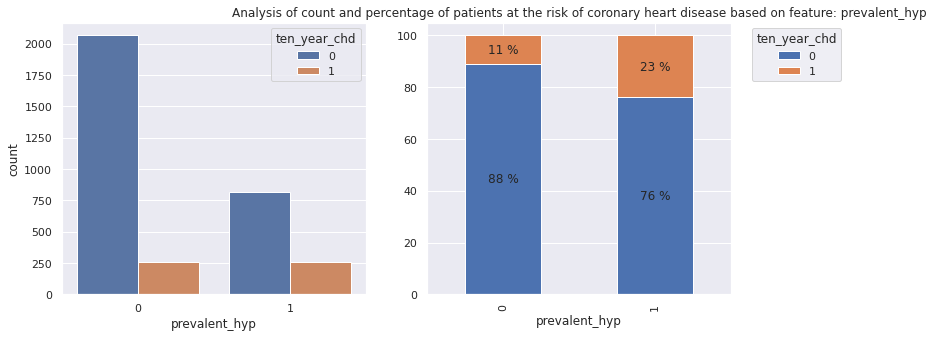

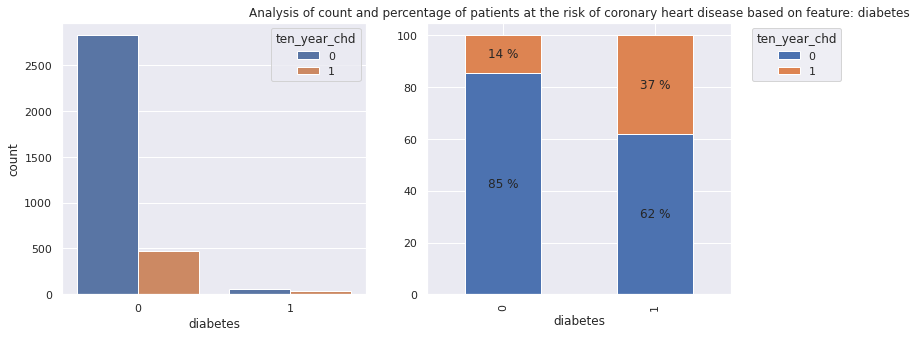

In [192]:
plot_percentage(categorical_features)

<Figure size 1440x720 with 0 Axes>

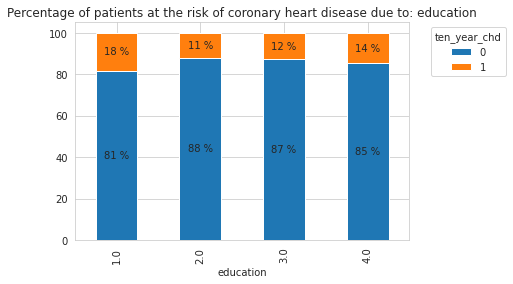

<Figure size 1440x720 with 0 Axes>

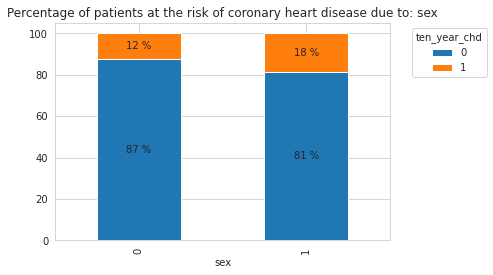

<Figure size 1440x720 with 0 Axes>

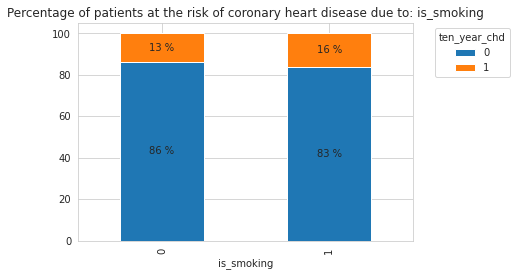

<Figure size 1440x720 with 0 Axes>

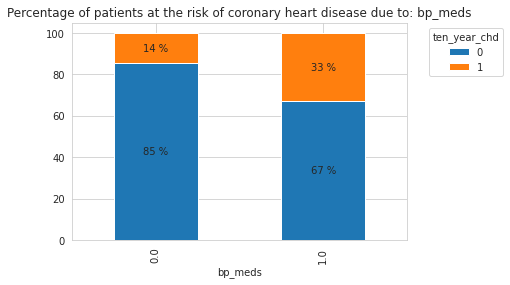

<Figure size 1440x720 with 0 Axes>

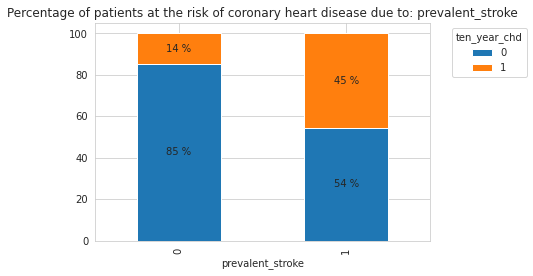

<Figure size 1440x720 with 0 Axes>

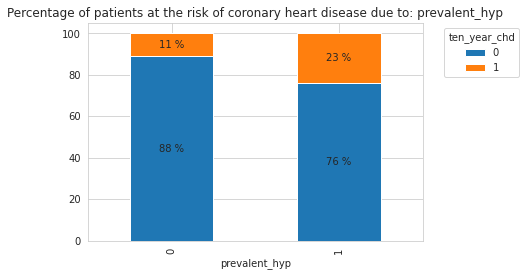

<Figure size 1440x720 with 0 Axes>

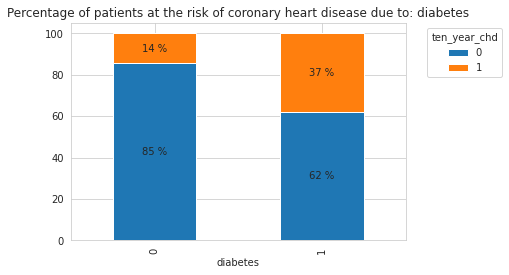

In [89]:

for feature in categorical_features:
    x_var, y_var = feature, 'ten_year_chd'
    plt.figure(figsize=(20,10))
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    data_grouped.plot.bar(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("Percentage of patients at the risk of coronary heart disease due to: "+feature)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                   
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()